<a href="https://colab.research.google.com/github/ngocbaosp/ML-Projects/blob/master/AutoMLProject01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install AutoML

In [1]:
!apt-get install swig -y
!pip install Cython numpy

# sometimes you have to run the next command twice on colab
# I haven't figured out why
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 7 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (1,288 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 131331 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpac

In [2]:
!pip install auto-sklearn

In [0]:
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

# Load data
X, y = sklearn.datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = \
        sklearn.model_selection.train_test_split(X, y, random_state=1)

In [6]:
import autosklearn.classification


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [7]:

# configure auto-sklearn
automl = autosklearn.classification.AutoSklearnClassifier(
          time_left_for_this_task=120, # run auto-sklearn for at most 2min
          per_run_time_limit=30, # spend at most 30 sec for each model training
          )

# train model(s)
automl.fit(X_train, y_train)

# evaluate
y_hat = automl.predict(X_test)
test_acc = sklearn.metrics.accuracy_score(y_test, y_hat)
print("Test Accuracy score {0}".format(test_acc))

/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-07-29 19:46:10,678:EnsembleBuilder(1):d74860caaa557f473ce23908ff7ba369] No models better than random - using Dummy Score!
[WARNING] [2019-07-29 19:46:10,696:EnsembleBuilder(1):d74860caaa557f473ce23908ff7ba369] No models better than random - using Dummy Score!


/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty

1
['/tmp/autosklearn_tmp_132_977/.auto-sklearn/ensembles/1.0000000000.ensemble', '/tmp/autosklearn_tmp_132_977/.auto-sklearn/ensembles/1.0000000001.ensemble', '/tmp/autosklearn_tmp_132_977/.auto-sklearn/ensembles/1.0000000002.ensemble', '/tmp/autosklearn_tmp_132_977/.auto-sklearn/ensembles/1.0000000003.ensemble']
Test Accuracy score 0.9933333333333333


In [0]:
automl.sprint_statistics()

In [0]:
automl.show_models()

In [0]:
automl.cv_results_

# AutoML

## Functions

In [0]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [0]:
#%% md
#### MyPCA
#%%
def myPCA(data,n):
    pca = PCA(n_components=n)
    pca.fit(data)
    df = pca.transform(data)
    PCA_Data = pd.DataFrame(df)
    return PCA_Data

#%% md
#### myNormalize
#%%
def myNormalize(data):
    min_max_scaler = preprocessing.MinMaxScaler()
    Normalized_Data = min_max_scaler.fit_transform(data)
    Normalized_Data = pd.DataFrame(Normalized_Data)
    return Normalized_Data

#%% md
#### myEncode
#%%
def myEncode(data,col): 
    NewData_Encode = data.copy()
    NewData_Encode = pd.get_dummies(NewData_Encode, columns=col, prefix = col)
    return NewData_Encode


#%% md
#### myCleanAndTransformData
#%%
def myCleanAndTransformData(data):
    
    #Drop null rows
    NewData = data.dropna()
    #Remove unknown ata
    NewData = NewData[NewData['episodes']!='Unknown']
    #Add a new column rating class 
    NewData['Class']=1
    # 1: High
    # or 0: Low based on rating
    NewData.loc[NewData['rating'] >= NewData['rating'].mean(), 'Class'] = 1
    NewData.loc[NewData['rating'] < NewData['rating'].mean(), 'Class'] = 0
    
    #Split genre values into rows
    NewData = pd.DataFrame(NewData.genre.str.split(',').tolist(), index=[NewData.anime_id,NewData.type,NewData.episodes,NewData.rating,NewData.members,NewData.Class]).stack()
    NewData = NewData.reset_index([0,'anime_id','type','episodes','rating','members','Class'])
    NewData.columns=['anime_id','type','episodes','rating','members','Class','genre']
    
    #Encode type feature: 6 unique values
    NewData = myEncode(NewData,['type'])
 
    #Encode genre feature: 82 unique values
    NewData = myEncode(NewData,['genre'])
 
     #Drop anmie_id,rating,Class
    NewData = NewData.drop(['rating'],axis=1)
    NewData = NewData.drop(columns=['anime_id'])
    NewData = NewData.drop(columns=['episodes'])  
    
    return NewData


#%% md
#### mySplitData
#%%
def mySplitData(X_Data,Y_Data,test_size,random_state):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_Data, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def mySplitDataByTrainSize(X_Data,Y_Data,train_size,random_state):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_Data, train_size=train_size, random_state=random_state)
    X_train, X_test, y_train, y_test = mySplitData(X_train,y_train,0.33,random_state)
    return X_train, X_test, y_train, y_test

In [14]:
#%% md
# Load data from files
#%%
RawData = pd.read_csv('anime.csv')
RawData.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [16]:
#%% md
#### Clean and Transform Data
#%%
Cleaned_Data = myCleanAndTransformData(RawData)
Y_Data = Cleaned_Data['Class']
X_Data = Cleaned_Data.drop(columns=['Class'])

#%% md
#### Normalize  Data
#%%
Normalized_Data = myNormalize(X_Data)
#%% md
#### PCA
#%%
n_components=40
PCA_Data = myPCA(Normalized_Data,n_components)
PCA_Data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-0.311391,0.786561,-0.420790,0.005234,-0.078663,-0.049646,-0.062640,0.007159,-0.075350,-0.030938,0.086247,-0.139425,-0.157022,0.028365,-0.081108,-0.232703,-0.299120,0.804699,-0.258797,-0.007687,-0.094831,-0.108054,-0.062475,0.025711,0.003369,-0.024983,-0.033523,-0.004934,-0.011702,-0.006729,-0.011742,-0.014507,0.009433,-0.010485,-0.008221,-0.004127,0.005306,-0.012853,-0.006433,-0.008562
1,-0.284662,0.764035,-0.411982,-0.010872,-0.110067,-0.087035,-0.096786,0.054585,-0.179466,-0.045549,0.764383,0.581495,0.033808,-0.066725,0.030970,0.068166,0.010372,-0.031955,-0.043632,0.008161,-0.027471,-0.040192,-0.033360,0.004737,0.006610,-0.016134,-0.028708,-0.009434,-0.005291,-0.004034,-0.007216,-0.013007,0.006323,-0.011350,-0.008301,-0.001372,0.008429,-0.012475,-0.008168,-0.009003
2,-0.284659,0.767955,-0.395541,-0.007615,-0.091869,-0.059768,-0.062093,0.036484,-0.086830,-0.024722,0.092133,-0.282600,-0.452072,-0.568979,0.527521,0.286982,0.035407,-0.060924,-0.105755,-0.014484,-0.031113,-0.062844,-0.045536,0.012570,0.004928,-0.021738,-0.033730,-0.011367,-0.009055,-0.006117,-0.009460,-0.014713,0.006533,-0.012725,-0.009930,-0.005330,0.006565,-0.014448,-0.012789,-0.008875
3,-0.291422,0.777222,-0.408286,0.000300,-0.080828,-0.049801,-0.056895,0.019128,-0.070776,-0.027971,0.078002,-0.143408,-0.122654,-0.013020,-0.109531,-0.389553,-0.602799,-0.563673,-0.290784,-0.050571,-0.053018,-0.099431,-0.061850,0.024372,0.000898,-0.027266,-0.035613,-0.010752,-0.013571,-0.007647,-0.012239,-0.015412,0.007587,-0.011299,-0.009393,-0.007804,0.004307,-0.014111,-0.011770,-0.010724
4,0.731807,-0.153182,-0.102195,-0.458238,0.816873,0.046188,0.015792,-0.064744,0.014353,-0.005002,0.000638,0.017529,-0.007235,0.008140,0.015745,-0.003273,-0.012159,-0.006524,-0.014003,0.005176,-0.027948,-0.018706,-0.009773,-0.001108,0.018647,0.005479,-0.018145,0.010230,0.021768,0.001473,0.006900,-0.013188,0.019870,-0.014564,-0.007068,0.027246,0.025586,-0.017256,0.000591,0.043840


In [17]:
#%% md
####----------------------------------------------------------------
#### Split  PCA_Data
####----------------------------------------------------------------
#%%
PCA_X_train, PCA_X_test, PCA_y_train, PCA_y_test  = mySplitData(PCA_Data,Y_Data,0.33,42)

PCA_X_train.head()
#%%
PCA_X_test.head()
#%%
PCA_y_train.head()
#%%
PCA_y_test.head()

22373    0
10508    1
11570    1
22262    0
734      1
Name: Class, dtype: int64

## **Train and Test Model**

In [18]:
# configure auto-sklearn
anmie_automl = autosklearn.classification.AutoSklearnClassifier(
          time_left_for_this_task=120, # run auto-sklearn for at most 2min
          per_run_time_limit=30, # spend at most 30 sec for each model training
          include_preprocessors=["no_preprocessing"]
          )

# train model(s)
anmie_automl.fit(PCA_X_train, PCA_y_train)

# evaluate
PCA_y_predicted = anmie_automl.predict(PCA_X_test)
test_acc = sklearn.metrics.accuracy_score(PCA_y_test, PCA_y_predicted)
print("Test Accuracy score {0}".format(test_acc))

/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-07-29 20:08:53,690:EnsembleBuilder(1):71f0d138d36d804a44a29370a5721519] No models better than random - using Dummy Score!
[WARNING] [2019-07-29 20:08:53,704:EnsembleBuilder(1):71f0d138d36d804a44a29370a5721519] No models better than random - using Dummy Score!
[WARNING] [2019-07-29 20:08:55,709:EnsembleBuilder(1):71f0d138d36d804a44a29370a5721519] No models better than random - using Dummy Score!
[WARNING] [2019-07-29 20:08:57,716:EnsembleBuilder(1):71f0d138d36d804a44a29370a5721519] No models better than random - using Dummy Score!
[WARNING] [2019-07-29 20:08:59,722:EnsembleBuilder(1):71f0d138d36d804a44a29370a5721519] No models better than random - using Dummy Score!
[WARNING] [2019-07-29 20:09:01,737:EnsembleBuilder(1):71f0d138d36d804a44a29370a5721519] No models better than random - using Dummy Score!
[WARNING] [2019-07-29 20:09:03,752:EnsembleBuilder(1):71f0d138d36d804a44a29370a5721519] No models better than random - using Dummy Score!


/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-07-29 20:10:38,380:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2019-07-29 20:10:38,380:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
1
['/tmp/autosklearn_tmp_132_195/.auto-sklearn/ensembles/1.0000000000.ensemble', '/tmp/autosklearn_tmp_132_195/.auto-sklearn/ensembles/1.0000000001.ensemble', '/tmp/autosklearn_tmp_132_195/.auto-sklearn/ensembles/1.0000000002.ensemble']
Test Accuracy score 0.7654299733149694


## Inspecting the results

In [19]:
automl.sprint_statistics()

'auto-sklearn results:\n  Dataset name: d74860caaa557f473ce23908ff7ba369\n  Metric: accuracy\n  Best validation score: 0.991011\n  Number of target algorithm runs: 26\n  Number of successful target algorithm runs: 22\n  Number of crashed target algorithm runs: 2\n  Number of target algorithms that exceeded the time limit: 2\n  Number of target algorithms that exceeded the memory limit: 0\n'

In [20]:
anmie_automl.show_models()

"[(0.640000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'one_hot_encoding', 'classifier:__choice__': 'random_forest', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'standardize', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'True', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 1, 'classifier:random_forest:min_samples_split': 2, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'classifier:random_forest:n_estimators': 100, 'categorical_encoding:one_hot_encoding:minimum_fraction': 0.01},\ndataset_properties={\n  'task': 1,\n  'sparse': False,\n  'multilabel': False,\n  'mul

In [21]:
anmie_automl.cv_results_

{'mean_fit_time': array([10.36883998, 30.03817606, 30.03083205, 30.03898716,  0.47739506,
         3.01575017]),
 'mean_test_score': array([0.74174483, 0.        , 0.        , 0.        , 0.65758705,
        0.        ]),
 'param_balancing:strategy': masked_array(data=['none', 'weighting', 'none', 'none', 'weighting',
                    'none'],
              mask=[False, False, False, False, False, False],
        fill_value='N/A',
             dtype='<U9'),
 'param_categorical_encoding:__choice__': masked_array(data=['one_hot_encoding', 'one_hot_encoding',
                    'one_hot_encoding', 'one_hot_encoding',
                    'one_hot_encoding', 'one_hot_encoding'],
              mask=[False, False, False, False, False, False],
        fill_value='N/A',
             dtype='<U16'),
 'param_categorical_encoding:one_hot_encoding:minimum_fraction': masked_array(data=[0.01, 0.010000000000000004, --, --,
                    0.00034835629696198427, 0.00012586572428922356],
       

# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)

# train model(s)
knn_m = knn.fit(PCA_X_train, PCA_y_train)

# evaluate
knn_test_acc = knn_m.score(PCA_X_test,PCA_y_test)
print("Test Accuracy score {0}".format(knn_test_acc))

Test Accuracy score 0.7884996126366531


# SVM

In [23]:
#Import svm model
from sklearn import svm

# Create a svm Classifier with PCA data
svc = svm.SVC(C=1.0, gamma=0.1, kernel='rbf') # Linear Kernel

# train model(s)
svm_m = svc.fit(PCA_X_train, PCA_y_train)

# evaluate
svm_test_acc = svm_m.score(PCA_X_test,PCA_y_test)
print("Test Accuracy score {0}".format(svm_test_acc))

Test Accuracy score 0.6978565894809331


# DT

In [24]:
#Import svm model
from sklearn.tree import DecisionTreeClassifier


# Create a DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0,max_depth=30,min_samples_leaf=20)


# train model(s)
dt_m = dt.fit(PCA_X_train, PCA_y_train)

# evaluate
dt_test_acc = dt_m.score(PCA_X_test,PCA_y_test)
print("Test Accuracy score {0}".format(dt_test_acc))


Test Accuracy score 0.794525264698287


# Random Forest

In [27]:
#Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier with original data
rf = RandomForestClassifier(n_estimators=300, max_depth=15, min_samples_leaf=1, min_samples_split=5, max_features='log2', criterion='gini')

# train model(s)
rf_m = rf.fit(PCA_X_train, PCA_y_train)

# evaluate
rf_test_acc = rf_m.score(PCA_X_test,PCA_y_test)
print("Test Accuracy score {0}".format(rf_test_acc))


Test Accuracy score 0.7973659292416286


# Neuron Network

In [38]:
#Import svm model
from sklearn.neural_network import MLPClassifier

# Create a NN Classifier with PCA data
nn = MLPClassifier(max_iter=500)

# train model(s)
nn_m = nn.fit(PCA_X_train, PCA_y_train)

# evaluate
nn_test_acc = nn_m.score(PCA_X_test,PCA_y_test)
print("Test Accuracy score {0}".format(nn_test_acc))


Test Accuracy score 0.7011276577429629


# Comparision 

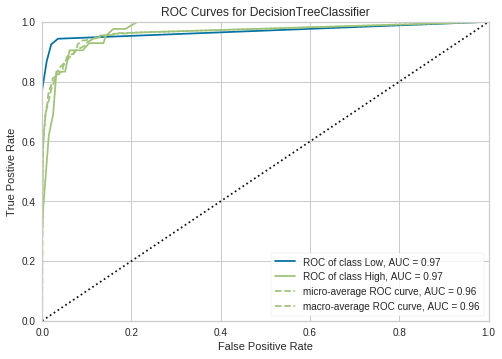

In [33]:
from yellowbrick.classifier import ROCAUC
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0,max_depth=30,min_samples_leaf=20)
classes = ["Low", "High"]
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(dt,classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()     

In [36]:
clf = DecisionTreeClassifier(random_state=0,max_depth=30,min_samples_leaf=20)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc

dt_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)
dt_lm.fit(X_test, y_test)

y_pred_dt = clf.predict_proba(X_test)[:, 1]
roc = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr_dt, tpr_dt)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dt, tpr_dt, label='ROC of DT (AUC = %0.2f)' % roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

ValueError: ignored